# Customer Analytics - Targeting, Descriptive Analytics (Part 2)

In [73]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import pickle

In [74]:
sns.set()

In [75]:
df = pd.read_csv('/Users/mhlaghari/Downloads/purchase data.csv')

In [76]:
df.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_3,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,0,47,1,110866,1,0
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,0,47,1,110866,1,0
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,0,47,1,110866,1,0


In [77]:
scaler = pickle.load(open('scaler.pickle','rb'))
pca = pickle.load(open('pca.pickle','rb'))
kmeans_pca = pickle.load(open('kmeans_pca.pickle','rb'))

In [78]:
df.columns

Index(['ID', 'Day', 'Incidence', 'Brand', 'Quantity', 'Last_Inc_Brand',
       'Last_Inc_Quantity', 'Price_1', 'Price_2', 'Price_3', 'Price_4',
       'Price_5', 'Promotion_1', 'Promotion_2', 'Promotion_3', 'Promotion_4',
       'Promotion_5', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [79]:
features = df[['Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size']]
df_purchase_segm_std = scaler.transform(features)

In [80]:
df_purchase_segm_pca = pca.transform(df_purchase_segm_std)

In [81]:
df_purchase_segm_kmeans_pca = kmeans_pca.predict(df_purchase_segm_pca)

In [82]:
df_purchase_predictors = df.copy()

In [83]:
df_purchase_predictors['Segment'] = df_purchase_segm_kmeans_pca

# Descriptive Analysis by Segments

In [84]:
df_purchase_predictors.head()

,ID,Day,Incidence,Brand,Quantity,Last_Inc_Brand,Last_Inc_Quantity,Price_1,Price_2,Price_3,...,Promotion_4,Promotion_5,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Segment
0,200000001,1,0,0,0,0,0,1.59,1.87,2.01,...,0,0,0,0,47,1,110866,1,0,2
1,200000001,11,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
2,200000001,12,0,0,0,0,0,1.51,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2
3,200000001,16,0,0,0,0,0,1.52,1.89,1.98,...,0,0,0,0,47,1,110866,1,0,2
4,200000001,18,0,0,0,0,0,1.52,1.89,1.99,...,0,0,0,0,47,1,110866,1,0,2


In [85]:
temp1 = df_purchase_predictors[['ID','Incidence']].groupby(['ID'], as_index=False).count()
temp1 = temp1.set_index('ID')
temp1 = temp1.rename(columns = {'Incidence': 'N_visits'})
temp1.head()

,N_visits
ID,
200000001,101
200000002,87
200000003,97
200000004,85
200000005,111


In [86]:
temp2 = df_purchase_predictors[['ID','Incidence']].groupby(['ID'], as_index=False).sum()
temp2 = temp2.set_index('ID')
temp2 = temp2.rename(columns = {'Incidence': 'N_purchases'})
temp3 = temp1.join(temp2)
temp3.head()

,N_visits,N_purchases
ID,,
200000001,101,9
200000002,87,11
200000003,97,10
200000004,85,11
200000005,111,13


In [87]:
temp3['Avg_N_Visits'] = temp3['N_purchases'] / temp3['N_visits']
temp3.head()

,N_visits,N_purchases,Avg_N_Visits
ID,,,
200000001,101,9,0.089109
200000002,87,11,0.126437
200000003,97,10,0.103093
200000004,85,11,0.129412
200000005,111,13,0.117117


In [88]:
temp4 = df_purchase_predictors[['ID','Segment']].groupby(['ID'], as_index=False).mean()
temp4 = temp4.set_index('ID')
df_purchase_descr = temp3.join(temp4)
df_purchase_descr.head()

,N_visits,N_purchases,Avg_N_Visits,Segment
ID,,,,
200000001,101,9,0.089109,2
200000002,87,11,0.126437,3
200000003,97,10,0.103093,2
200000004,85,11,0.129412,2
200000005,111,13,0.117117,1


In [89]:
df_purchase_descr.shape[0]

500

In [90]:
segm_prop = df_purchase_descr[['N_purchases','Segment']].groupby(['Segment'], as_index=False).count() / df_purchase_descr.shape[0]
segm_prop = segm_prop.rename(columns = {'N_purchases': 'Segment_proportions'})
segm_prop.head()

,Segment,Segment_proportions
0,0.000,0.206
1,0.002,0.220
2,0.004,0.378
3,0.006,0.196


Text(0.5, 1.0, 'Segment Propotions')

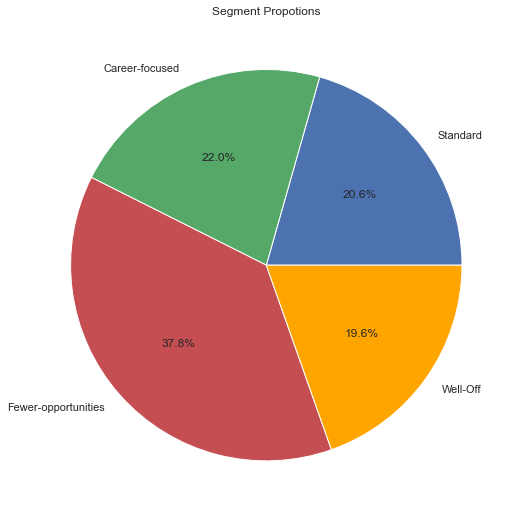

In [91]:
plt.figure(figsize=(12,9))
plt.pie(segm_prop['Segment_proportions'],
       labels=['Standard','Career-focused','Fewer-opportunities','Well-Off'],
       autopct='%1.1f%%',
       colors= ('b','g','r','orange'))
plt.title('Segment Propotions')

# Purchase occasions and Purchase incidence

In [92]:
segments_mean = df_purchase_descr.groupby(['Segment']).mean()
segments_mean

,N_visits,N_purchases,Avg_N_Visits
Segment,,,
0,117.699029,24.902913,0.212773
1,123.454545,39.827273,0.283102
2,113.730159,22.756614,0.201588
3,117.295918,34.602041,0.284478


In [93]:
segments_std = df_purchase_descr.groupby(['Segment']).std()
segments_std

,N_visits,N_purchases,Avg_N_Visits
Segment,,,
0,19.039605,16.774464,0.126603
1,44.864656,53.744530,0.200056
2,16.410498,13.815040,0.120335
3,20.716152,25.900579,0.171787


Text(0.5, 1.0, 'Average number of store visits by Segment')

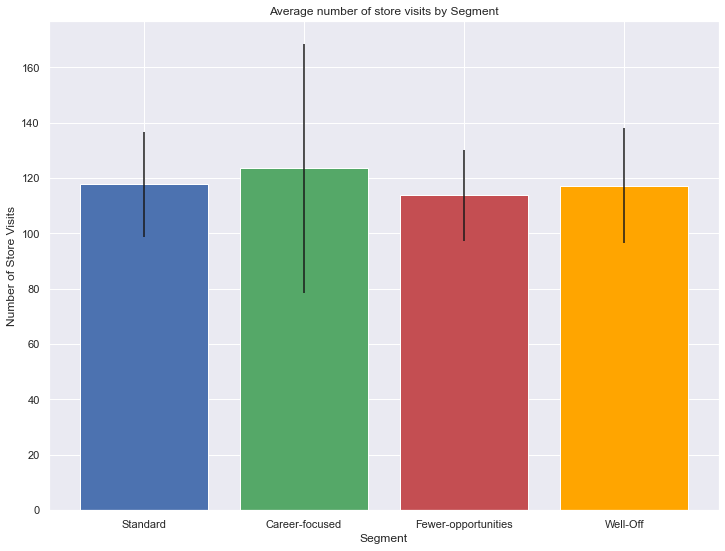

In [94]:
plt.figure(figsize=(12,9))
plt.bar(x=(0,1,2,3),
        tick_label =('Standard','Career-focused','Fewer-opportunities','Well-Off'),
       height = segments_mean['N_visits'],
       yerr = segments_std['N_visits'], #Y-Error
        color = ('b','g','r','orange'))
plt.xlabel('Segment')
plt.ylabel('Number of Store Visits')
plt.title('Average number of store visits by Segment')

Text(0.5, 1.0, 'Number of Purchase incidences')

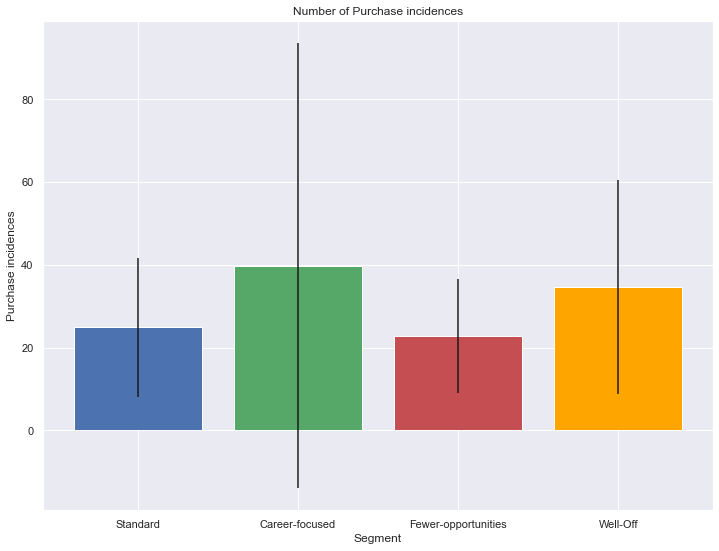

In [95]:
plt.figure(figsize=(12,9))
plt.bar(x=(0,1,2,3),
        tick_label =('Standard','Career-focused','Fewer-opportunities','Well-Off'),
       height = segments_mean['N_purchases'],
       yerr = segments_std['N_purchases'], #Y-Error
        color = ('b','g','r','orange'))
plt.xlabel('Segment')
plt.ylabel('Purchase incidences')
plt.title('Number of Purchase incidences')

# Brand Choice

In [96]:
df_purchase_incidence = df_purchase_predictors[df_purchase_predictors['Incidence'] == 1]

In [97]:
brand_dummies = pd.get_dummies(df_purchase_incidence['Brand'], prefix_sep='_')
brand_dummies['Segment'], brand_dummies['ID'] = df_purchase_incidence['Segment'], df_purchase_incidence['ID']
brand_dummies

,1,2,3,4,5,Segment,ID
6,0,1,0,0,0,2,200000001
11,0,0,0,0,1,2,200000001
19,1,0,0,0,0,2,200000001
24,0,0,0,1,0,2,200000001
29,0,1,0,0,0,2,200000001
...,...,...,...,...,...,...,...
58621,0,1,0,0,0,2,200000500
58648,1,0,0,0,0,2,200000500
58674,0,1,0,0,0,2,200000500
58687,0,1,0,0,0,2,200000500


In [98]:
temp = brand_dummies.groupby(['ID'], as_index=True).mean()

In [99]:
mean_brand_choice = temp.groupby(['Segment'], as_index=True).mean()

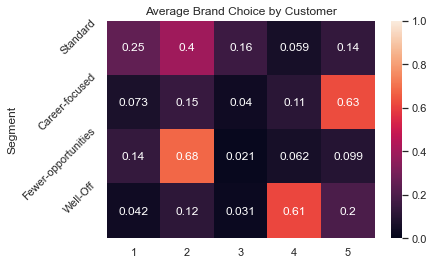

In [100]:
sns.heatmap(mean_brand_choice, annot= True, vmax= 1, vmin= 0)
plt.yticks([0,1,2,3], ['Standard','Career-focused','Fewer-opportunities','Well-Off'], rotation = 45)
plt.title('Average Brand Choice by Customer')
plt.show()

Brands 1 - 5 are on a scale of Cheap to Expensive. 

What we can conclude from our heatmap is that people from 
* 'fewer-opportunity' segment prefer purchasing brand 2 chocolates, and the 
* 'Career-focused' like to buy expensive brands, probably it has organic ingredients, or made from expensive cocoa powder, which further increases the brand value and price. 
* 'Well-off' segment also buys luxurious brands, but not the most expensive ones
* 'Standard' is the most heterogeneous segment, they buy from all brands, mostly brand 2 and their least favorite is brand 4.

# Dissecting revenue by segment

In [101]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 1]
temp.loc[:, 'Revenue Brand 1'] = temp['Price_1'] * temp['Quantity']
segments_brand_revenue = pd.DataFrame()
segments_brand_revenue[['Segment', 'Revenue Brand 1']] = temp[['Segment', 'Revenue Brand 1']].groupby(['Segment'],as_index = False).sum()
segments_brand_revenue

/usr/local/Cellar/jupyterlab/2.2.9_1/libexec/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/Cellar/jupyterlab/2.2.9_1/libexec/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,Segment,Revenue Brand 1
0,0,2611.19
1,1,736.09
2,2,2258.90
3,3,699.47


*Revenue = P * Q*

In [102]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 2]
temp.loc[:, 'Revenue Brand 2'] = temp['Price_2'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 2']] = temp[['Segment', 
                                                               'Revenue Brand 2']].groupby(['Segment'],
                                                                                           as_index = False).sum()

/usr/local/Cellar/jupyterlab/2.2.9_1/libexec/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/Cellar/jupyterlab/2.2.9_1/libexec/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [103]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 3]
temp.loc[:, 'Revenue Brand 3'] = temp['Price_3'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 3']] = temp[['Segment', 
                                                               'Revenue Brand 3']].groupby(['Segment'],
                                                                                           as_index = False).sum()

/usr/local/Cellar/jupyterlab/2.2.9_1/libexec/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/Cellar/jupyterlab/2.2.9_1/libexec/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [104]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 4]
temp.loc[:, 'Revenue Brand 4'] = temp['Price_4'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 4']] = temp[['Segment', 
                                                               'Revenue Brand 4']].groupby(['Segment'],
                                                                                           as_index = False).sum()

/usr/local/Cellar/jupyterlab/2.2.9_1/libexec/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/Cellar/jupyterlab/2.2.9_1/libexec/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [105]:
temp = df_purchase_predictors[df_purchase_predictors['Brand'] == 5]
temp.loc[:, 'Revenue Brand 5'] = temp['Price_5'] * temp['Quantity']
segments_brand_revenue[['Segment', 'Revenue Brand 5']] = temp[['Segment', 
                                                               'Revenue Brand 5']].groupby(['Segment'],
                                                                                           as_index = False).sum()

/usr/local/Cellar/jupyterlab/2.2.9_1/libexec/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/usr/local/Cellar/jupyterlab/2.2.9_1/libexec/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [106]:
segments_brand_revenue['Total Revenue'] = (segments_brand_revenue['Revenue Brand 1'] +
segments_brand_revenue['Revenue Brand 2'] +
segments_brand_revenue['Revenue Brand 3'] +
segments_brand_revenue['Revenue Brand 4'] +
segments_brand_revenue['Revenue Brand 5'] 
                                          )
segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue
0,0,2611.19,4768.52,3909.17,861.38,2439.75,14590.01
1,1,736.09,1746.42,664.75,2363.84,19441.06,24952.16
2,2,2258.90,13955.14,716.25,1629.31,2230.50,20790.10
3,3,699.47,1298.23,731.35,14185.57,5509.69,22424.31


In [107]:
segments_brand_revenue['Segment Proportions'] = segm_prop['Segment_proportions']
segments_brand_revenue['Segment'] = segments_brand_revenue['Segment'].map({0: 'Standard', 1: 'Career-Focused',
                                                                          2: 'Fewer-Opportunities',
                                                                          3: 'Well-Off'})
segments_brand_revenue

,Segment,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue,Segment Proportions
0,Standard,2611.19,4768.52,3909.17,861.38,2439.75,14590.01,0.206
1,Career-Focused,736.09,1746.42,664.75,2363.84,19441.06,24952.16,0.220
2,Fewer-Opportunities,2258.90,13955.14,716.25,1629.31,2230.50,20790.10,0.378
3,Well-Off,699.47,1298.23,731.35,14185.57,5509.69,22424.31,0.196


In [108]:
segments_brand_revenue = segments_brand_revenue.set_index(['Segment'])
segments_brand_revenue

,Revenue Brand 1,Revenue Brand 2,Revenue Brand 3,Revenue Brand 4,Revenue Brand 5,Total Revenue,Segment Proportions
Segment,,,,,,,
Standard,2611.19,4768.52,3909.17,861.38,2439.75,14590.01,0.206
Career-Focused,736.09,1746.42,664.75,2363.84,19441.06,24952.16,0.220
Fewer-Opportunities,2258.90,13955.14,716.25,1629.31,2230.50,20790.10,0.378
Well-Off,699.47,1298.23,731.35,14185.57,5509.69,22424.31,0.196


<AxesSubplot:xlabel='Segment'>

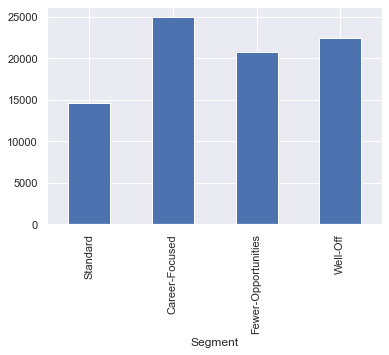

In [117]:
segments_brand_revenue['Total Revenue'].plot(kind='bar')